<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana2/Notebooks/Simulaci%C3%B3n_de_variables_aleatorias_continuas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew  # curtosis y asimetría
from scipy.stats import levy_stable , norm, cauchy, levy
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación uniforme

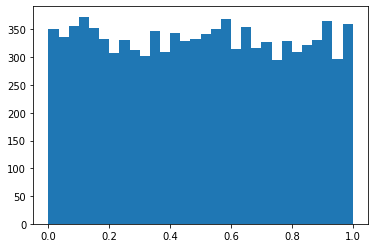

In [ ]:
# generación de una muestra aleatoria con distribución de la place
a, b = 0., 1.
n = 10000
s = np.random.uniform(a, b, n)
plt.hist(s, bins=30)

plt.show()

Curtosis de una distribución uniforme = -1.2  
(La distribucion normal tiene 0 de kurtosis)

In [ ]:
kurtosis(s)

-1.191414137606744

Asimetría de una distribución uniforme = 0

In [ ]:
skew(s)

-0.008390026478003739

## Distribución de probabilidad uniforme

$p(x)= \frac{1}{b-a}$

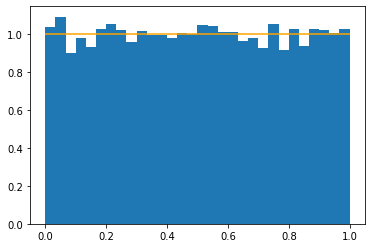

In [ ]:
plt.hist( s, bins=30, density=True)   # distribución de la muestra
plt.hlines(1/(b-a), xmin=a, xmax=b, color='orange')    # distribución teórica
plt.show()

# Simulación gaussiana

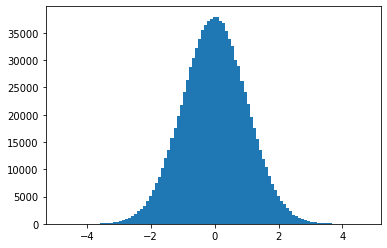

In [ ]:
# generación de una muestra aleatoria con distribución normal
mu, sigma = 0., 1.
s = np.random.normal(mu, sigma, 1000000)
plt.hist( s, bins=100)
plt.show()

In [ ]:
# Curtosis de la distribución normal = 0
kurtosis(s), skew(s)

(-0.0038048622734967452, 0.00010068062175325571)

## Distribución de probabilidad gaussiana

Probability density function (pdf)

$f(x)= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $

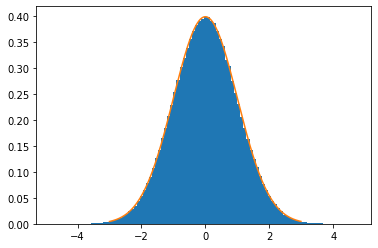

In [ ]:
x = np.arange(-3., 3., .01)
pdf = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) )  # función de la distribución de probabilidad de gauss

plt.hist( s, bins=100, density=True)
plt.plot(x, pdf)
plt.show()

# Simulación Laplace

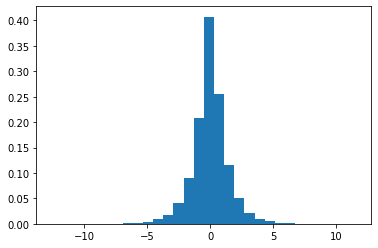

Curtosis: 3.1634106075504773,
Asimetría = -0.032959903709527866


In [ ]:
# generación de una muestra aleatoria con distribución de Laplace
loc, scale = 0., 1
s = np.random.laplace(loc, scale, 100000)
plt.hist( s, bins=30,  density=True)
plt.show()
print('Curtosis: {},\nAsimetría = {}'.format(kurtosis(s),skew(s)))

La curtosis de la distribución laplace es 3, y la asimetría 0

## Distribución de probabilidad de Laplace

$f(x;\mu,\lambda)= \frac{1}{2\lambda}\exp({-\frac{\lvert{x-\mu}\rvert}{\lambda}}) $

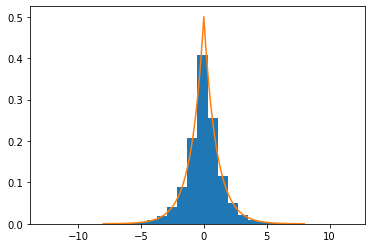

In [ ]:
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)  # función de la distribución de probabilidad de laplace

plt.hist( s, bins=30, density=True)
plt.plot(x, pdf)
plt.show()